In [59]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from white_demura import mean_pooling, run_dfs, run_dfs_green, reconstruct_mask, RGB_mask_no_roi, RGB_mask, sum_contour, read_and_extract_roi, apply_mask, get_signal_mapping, generate_mapping, extract_middle_roi
from read_images import generate_RGB_dataframes, get_signal_mapping_overlap

In [2]:
edge_path = '/Users/codyyu/Desktop/leakage_data_WHITE_TEST/mask_edges.png'
edge_image = cv2.imread(edge_path, cv2.IMREAD_GRAYSCALE)
edge_mask = np.where(edge_image == 255, 1, 0)

In [3]:
red_image_path = '/Users/codyyu/Desktop/leakage_data_WHITE_TEST/noisy/128_128_128_X_125999.bmp'
green_image_path = '/Users/codyyu/Desktop/leakage_data_WHITE_TEST/noisy/128_128_128_Y_91000.bmp'
blue_image_path = '/Users/codyyu/Desktop/leakage_data_WHITE_TEST/noisy/128_128_128_Z_140000.bmp'
clear_image_path = '/Users/codyyu/Desktop/leakage_data_WHITE_TEST/noisy/128_128_128_clear_125999.bmp'


red_image_255 = cv2.imread(red_image_path, cv2.IMREAD_GRAYSCALE) * edge_mask
green_image_255 = cv2.imread(green_image_path, cv2.IMREAD_GRAYSCALE) * edge_mask
blue_image_255 = cv2.imread(blue_image_path, cv2.IMREAD_GRAYSCALE) * edge_mask
clear_image_255 = cv2.imread(blue_image_path, cv2.IMREAD_GRAYSCALE) * edge_mask

red_image_255 = mean_pooling(red_image_255, 6).astype(np.int16)
green_image_255 = mean_pooling(green_image_255, 6).astype(np.int16)
blue_image_255 = mean_pooling(blue_image_255, 6).astype(np.int16)
clear_image_255 = mean_pooling(clear_image_255, 6).astype(np.int16)

red_binary = np.where(red_image_255 > 8, 255, 0)
green_binary = np.where(green_image_255 > 8, 255, 0)
blue_binary = np.where(blue_image_255 > 8, 255, 0)


In [4]:
red_covered_pixels_mapping = run_dfs(red_binary,3)


copying array
creating boolean table
running
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266

In [5]:
green_covered_pixels_mapping = run_dfs(green_binary,5)


copying array
creating boolean table
running
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266

In [6]:
blue_covered_pixels_mapping = run_dfs(blue_binary,4)

copying array
creating boolean table
running
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266

In [7]:
#red_new_df, green_new_df, blue_new_df, a = generate_RGB_dataframes(red_covered_pixels_mapping, green_covered_pixels_mapping, blue_covered_pixels_mapping, True, 5)

In [8]:

clear_image_noisy_16 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/noisy/16_random_clear_11200000.bmp', cv2.IMREAD_GRAYSCALE) * edge_mask
clear_image_noisy_32 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/noisy/32_random_clear_2800000.bmp', cv2.IMREAD_GRAYSCALE) * edge_mask
clear_image_noisy_128 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/noisy/128_random_clear_125999.bmp', cv2.IMREAD_GRAYSCALE) * edge_mask

red_image_noisy_16 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/noisy/16_random_X_11200000.bmp', cv2.IMREAD_GRAYSCALE) * edge_mask
red_image_noisy_32 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/noisy/32_random_X_3500000.bmp', cv2.IMREAD_GRAYSCALE) * edge_mask
red_image_noisy_128 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/noisy/128_random_X_125999.bmp', cv2.IMREAD_GRAYSCALE) * edge_mask

green_image_noisy_16 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/noisy/16_random_clear_11200000.bmp', cv2.IMREAD_GRAYSCALE) * edge_mask
green_image_noisy_32 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/noisy/32_random_Y_2100000.bmp', cv2.IMREAD_GRAYSCALE) * edge_mask
green_image_noisy_128 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/noisy/128_random_Y_91000.bmp', cv2.IMREAD_GRAYSCALE) * edge_mask


blue_image_noisy_16 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/noisy/16_random_Z_14699999.bmp', cv2.IMREAD_GRAYSCALE) * edge_mask
blue_image_noisy_32 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/noisy/32_random_Z_4550000.bmp', cv2.IMREAD_GRAYSCALE) * edge_mask
blue_image_noisy_128 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/noisy/128_random_Z_140000.bmp', cv2.IMREAD_GRAYSCALE) * edge_mask

In [9]:
kernal = 6

clear_image_noisy_16 = mean_pooling(clear_image_noisy_16, kernal).astype(np.int16)
clear_image_noisy_32 = mean_pooling(clear_image_noisy_32, kernal).astype(np.int16)
clear_image_noisy_128 = mean_pooling(clear_image_noisy_128, kernal).astype(np.int16)

red_image_noisy_16 = mean_pooling(red_image_noisy_16, kernal).astype(np.int16)
red_image_noisy_32 = mean_pooling(red_image_noisy_32, kernal).astype(np.int16)
red_image_noisy_128 = mean_pooling(red_image_noisy_128, kernal).astype(np.int16)

green_image_noisy_16 = mean_pooling(green_image_noisy_16, kernal).astype(np.int16)
green_image_noisy_32 = mean_pooling(green_image_noisy_32, kernal).astype(np.int16)
green_image_noisy_128 = mean_pooling(green_image_noisy_128, kernal).astype(np.int16)

blue_image_noisy_16 = mean_pooling(blue_image_noisy_16, kernal).astype(np.int16)
blue_image_noisy_32 = mean_pooling(blue_image_noisy_32, kernal).astype(np.int16)
blue_image_noisy_128 = mean_pooling(blue_image_noisy_128, kernal).astype(np.int16)



In [10]:
red_signal_map_16 = get_signal_mapping(clear_image_noisy_16, red_covered_pixels_mapping) 
red_signal_map_32 = get_signal_mapping(clear_image_noisy_32, red_covered_pixels_mapping)
red_signal_map_128 = get_signal_mapping(clear_image_noisy_128, red_covered_pixels_mapping)

green_signal_map_16 = get_signal_mapping(clear_image_noisy_16, green_covered_pixels_mapping)
green_signal_map_32 = get_signal_mapping(clear_image_noisy_32, green_covered_pixels_mapping)
green_signal_map_128 = get_signal_mapping(clear_image_noisy_128, green_covered_pixels_mapping)

blue_signal_map_16 = get_signal_mapping(clear_image_noisy_16, blue_covered_pixels_mapping)
blue_signal_map_32 = get_signal_mapping(clear_image_noisy_32, blue_covered_pixels_mapping)
blue_signal_map_128 = get_signal_mapping(clear_image_noisy_128, blue_covered_pixels_mapping)

In [11]:


red_signal_map_ground_truth_16 = get_signal_mapping(red_image_noisy_16, red_covered_pixels_mapping)
red_signal_map_ground_truth_32 = get_signal_mapping(red_image_noisy_32, red_covered_pixels_mapping)
red_signal_map_ground_truth_128 = get_signal_mapping(red_image_noisy_128, red_covered_pixels_mapping)


green_signal_map_ground_truth_16 = get_signal_mapping(green_image_noisy_16, green_covered_pixels_mapping)
green_signal_map_ground_truth_32 = get_signal_mapping(green_image_noisy_32, green_covered_pixels_mapping)
green_signal_map_ground_truth_128 = get_signal_mapping(green_image_noisy_128, green_covered_pixels_mapping)


blue_signal_map_ground_truth_16 = get_signal_mapping(blue_image_noisy_16, blue_covered_pixels_mapping)
blue_signal_map_ground_truth_32 = get_signal_mapping(blue_image_noisy_32, blue_covered_pixels_mapping)
blue_signal_map_ground_truth_128 = get_signal_mapping(blue_image_noisy_128, blue_covered_pixels_mapping)


red_df = pd.DataFrame()
green_df = pd.DataFrame()
blue_df = pd.DataFrame()


red_df["16_ground_truth_mapping"] = red_signal_map_ground_truth_16.values()
red_df["32_ground_truth_mapping"] = red_signal_map_ground_truth_32.values()
red_df["128_ground_truth_mapping"] = red_signal_map_ground_truth_128.values()


red_df["16_mapping"] = red_signal_map_16.values()
red_df["32_mapping"] = red_signal_map_32.values()
red_df["128_mapping"] = red_signal_map_128.values()

red_df["16_diff"] = red_df["16_ground_truth_mapping"] - red_df["16_mapping"]
red_df["32_diff"] = red_df["32_ground_truth_mapping"] - red_df["32_mapping"]
red_df["128_diff"] = red_df["128_ground_truth_mapping"] - red_df["128_mapping"]

red_df["16_to_gt_ratio"] = red_df["16_mapping"] / red_df["16_ground_truth_mapping"]
red_df["32_to_gt_ratio"] = red_df["32_mapping"] / red_df["32_ground_truth_mapping"]
red_df["128_to_gt_ratio"] = red_df["128_mapping"] / red_df["128_ground_truth_mapping"]


red_df["16_diff_percentage"] = ((red_df['16_to_gt_ratio'].mean() - 1) * 100)
red_df["32_diff_percentage"] = ((red_df['32_to_gt_ratio'].mean() - 1) * 100)
red_df["128_diff_percentage"] = ((red_df['128_to_gt_ratio'].mean() - 1) * 100)



red_df['16_normalized'] = red_df['16_to_gt_ratio'].mean() * red_df["16_ground_truth_mapping"]
red_df['32_normalized'] = red_df['32_to_gt_ratio'].mean() * red_df["32_ground_truth_mapping"]
red_df['128_normalized'] = red_df['128_to_gt_ratio'].mean() * red_df["128_ground_truth_mapping"]





green_df["16_ground_truth_mapping"] = green_signal_map_ground_truth_16.values()
green_df["32_ground_truth_mapping"] = green_signal_map_ground_truth_32.values()
green_df["128_ground_truth_mapping"] = green_signal_map_ground_truth_128.values()


green_df["16_mapping"] = green_signal_map_16.values()
green_df["32_mapping"] = green_signal_map_32.values()
green_df["128_mapping"] = green_signal_map_128.values()


green_df["16_diff"] = green_df["16_ground_truth_mapping"] - green_df["16_mapping"]
green_df["32_diff"] = green_df["32_ground_truth_mapping"] - green_df["32_mapping"]
green_df["128_diff"] = green_df["128_ground_truth_mapping"] - green_df["128_mapping"]


green_df["16_to_gt_ratio"] = green_df["16_mapping"] / green_df["16_ground_truth_mapping"]
green_df["32_to_gt_ratio"] = green_df["32_mapping"] / green_df["32_ground_truth_mapping"]
green_df["128_to_gt_ratio"] = green_df["128_mapping"] / green_df["128_ground_truth_mapping"]


green_df["16_diff_percentage"] = ((green_df['16_to_gt_ratio'].mean() - 1) * 100)
green_df["32_diff_percentage"] = ((green_df['32_to_gt_ratio'].mean() - 1) * 100)
green_df["128_diff_percentage"] = ((green_df['128_to_gt_ratio'].mean() - 1) * 100)


green_df['16_normalized'] = green_df['16_to_gt_ratio'].mean() * green_df["16_ground_truth_mapping"]
green_df['32_normalized'] = green_df['32_to_gt_ratio'].mean() * green_df["32_ground_truth_mapping"]
green_df['128_normalized'] = green_df['128_to_gt_ratio'].mean() * green_df["128_ground_truth_mapping"]


blue_df["16_ground_truth_mapping"] = blue_signal_map_ground_truth_16.values()
blue_df["32_ground_truth_mapping"] = blue_signal_map_ground_truth_32.values()
blue_df["128_ground_truth_mapping"] = blue_signal_map_ground_truth_128.values()


blue_df["16_mapping"] = blue_signal_map_16.values()
blue_df["32_mapping"] = blue_signal_map_32.values()
blue_df["128_mapping"] = blue_signal_map_128.values()
 
blue_df["16_diff"] = blue_df["16_ground_truth_mapping"] - blue_df["16_mapping"]
blue_df["32_diff"] = blue_df["32_ground_truth_mapping"] - blue_df["32_mapping"]
blue_df["128_diff"] = blue_df["128_ground_truth_mapping"] - blue_df["128_mapping"]


blue_df["16_to_gt_ratio"] = blue_df["16_mapping"] / blue_df["16_ground_truth_mapping"]
blue_df["32_to_gt_ratio"] = blue_df["32_mapping"] / blue_df["32_ground_truth_mapping"]
blue_df["128_to_gt_ratio"] = blue_df["128_mapping"] / blue_df["128_ground_truth_mapping"]


blue_df["16_diff_percentage"] = ((blue_df['16_to_gt_ratio'].mean() - 1) * 100)
blue_df["32_diff_percentage"] = ((blue_df['32_to_gt_ratio'].mean() - 1) * 100)
blue_df["128_diff_percentage"] = ((blue_df['128_to_gt_ratio'].mean() - 1) * 100)


blue_df['16_normalized'] = blue_df['16_to_gt_ratio'].mean() * blue_df["16_ground_truth_mapping"]
blue_df['32_normalized'] = blue_df['32_to_gt_ratio'].mean() * blue_df["32_ground_truth_mapping"]
blue_df['128_normalized'] = blue_df['128_to_gt_ratio'].mean() * blue_df["128_ground_truth_mapping"]


red_new_df = pd.DataFrame()

red_new_df['16_diff'] = 100 * ((red_df['16_mapping'] / red_df['16_mapping'].mean()) - (red_df['16_ground_truth_mapping'] / red_df['16_ground_truth_mapping'].mean()))/((red_df['16_ground_truth_mapping'] / red_df['16_ground_truth_mapping'].mean()))
red_new_df['32_diff'] = 100 * ((red_df['32_mapping'] / red_df['32_mapping'].mean()) - (red_df['32_ground_truth_mapping'] / red_df['32_ground_truth_mapping'].mean()))/((red_df['32_ground_truth_mapping'] / red_df['32_ground_truth_mapping'].mean()))
red_new_df['128_diff'] = 100 * ((red_df['128_mapping'] / red_df['128_mapping'].mean()) - (red_df['128_ground_truth_mapping'] / red_df['128_ground_truth_mapping'].mean()))/((red_df['128_ground_truth_mapping'] / red_df['128_ground_truth_mapping'].mean()))

red_new_df['A-1_16'] = 100 * ((red_df['16_mapping'] / red_df['16_mapping'].mean()) - 1)
red_new_df['A-1_32'] = 100 * ((red_df['32_mapping'] / red_df['32_mapping'].mean()) - 1)
red_new_df['A-1_128'] = 100 * ((red_df['128_mapping'] / red_df['128_mapping'].mean()) - 1)

red_new_df['B-1_16'] = 100 * ((red_df['16_ground_truth_mapping'] / red_df['16_ground_truth_mapping'].mean()) - 1)
red_new_df['B-1_32'] = 100 * ((red_df['32_ground_truth_mapping'] / red_df['32_ground_truth_mapping'].mean()) - 1)
red_new_df['B-1_128'] = 100 * ((red_df['128_ground_truth_mapping'] / red_df['128_ground_truth_mapping'].mean()) - 1)


green_new_df = pd.DataFrame()

green_new_df['16_diff'] = 100 * ((green_df['16_mapping'] / green_df['16_mapping'].mean()) - (green_df['16_ground_truth_mapping'] / green_df['16_ground_truth_mapping'].mean()))/((green_df['16_ground_truth_mapping'] / green_df['16_ground_truth_mapping'].mean()))
green_new_df['32_diff'] = 100 * ((green_df['32_mapping'] / green_df['32_mapping'].mean()) - (green_df['32_ground_truth_mapping'] / green_df['32_ground_truth_mapping'].mean()))/((green_df['32_ground_truth_mapping'] / green_df['32_ground_truth_mapping'].mean()))
green_new_df['128_diff'] = 100 * ((green_df['128_mapping'] / green_df['128_mapping'].mean()) - (green_df['128_ground_truth_mapping'] / green_df['128_ground_truth_mapping'].mean()))/((green_df['128_ground_truth_mapping'] / green_df['128_ground_truth_mapping'].mean()))


green_new_df['A-1_16'] = 100 * ((green_df['16_mapping'] / green_df['16_mapping'].mean()) - 1)
green_new_df['A-1_32'] = 100 * ((green_df['32_mapping'] / green_df['32_mapping'].mean()) - 1)
green_new_df['A-1_128'] = 100 * ((green_df['128_mapping'] / green_df['128_mapping'].mean()) - 1)

green_new_df['B-1_16'] = 100 * ((green_df['16_ground_truth_mapping'] / green_df['16_ground_truth_mapping'].mean()) - 1)
green_new_df['B-1_32'] = 100 * ((green_df['32_ground_truth_mapping'] / green_df['32_ground_truth_mapping'].mean()) - 1)
green_new_df['B-1_128'] = 100 * ((green_df['128_ground_truth_mapping'] / green_df['128_ground_truth_mapping'].mean()) - 1)


blue_new_df = pd.DataFrame()

blue_new_df['16_diff'] = 100 * ((blue_df['16_mapping'] / blue_df['16_mapping'].mean()) - (blue_df['16_ground_truth_mapping'] / blue_df['16_ground_truth_mapping'].mean()))/((blue_df['16_ground_truth_mapping'] / blue_df['16_ground_truth_mapping'].mean()))
blue_new_df['32_diff'] = 100 * ((blue_df['32_mapping'] / blue_df['32_mapping'].mean()) - (blue_df['32_ground_truth_mapping'] / blue_df['32_ground_truth_mapping'].mean()))/((blue_df['32_ground_truth_mapping'] / blue_df['32_ground_truth_mapping'].mean()))
blue_new_df['128_diff'] = 100 * ((blue_df['128_mapping'] / blue_df['128_mapping'].mean()) - (blue_df['128_ground_truth_mapping'] / blue_df['128_ground_truth_mapping'].mean()))/((blue_df['128_ground_truth_mapping'] / blue_df['128_ground_truth_mapping'].mean()))

blue_new_df['A-1_16'] = 100 * ((blue_df['16_mapping'] / blue_df['16_mapping'].mean()) - 1)
blue_new_df['A-1_32'] = 100 * ((blue_df['32_mapping'] / blue_df['32_mapping'].mean()) - 1)
blue_new_df['A-1_128'] = 100 * ((blue_df['128_mapping'] / blue_df['128_mapping'].mean()) - 1)

blue_new_df['B-1_16'] = 100 * ((blue_df['16_ground_truth_mapping'] / blue_df['16_ground_truth_mapping'].mean()) - 1)
blue_new_df['B-1_32'] = 100 * ((blue_df['32_ground_truth_mapping'] / blue_df['32_ground_truth_mapping'].mean()) - 1)
blue_new_df['B-1_128'] = 100 * ((blue_df['128_ground_truth_mapping'] / blue_df['128_ground_truth_mapping'].mean()) - 1)

In [12]:
red_new_df

16_diff   32_diff  128_diff     A-1_16     A-1_32    A-1_128  \
0      -2.299478 -3.288444 -1.336154  11.199930  -0.706358  -9.931952   
1      -1.054374 -2.278923 -2.224550  -6.400059 -18.914238  -9.680365   
2      -3.713709 -3.046695 -2.809756  -4.000061  -4.105162  -9.428778   
3      -3.159404 -2.008679 -3.002823 -19.733384 -14.787119 -11.189885   
4      -2.069201 -2.960581 -2.857572   2.933268   2.206903  -3.139110   
...          ...       ...       ...        ...        ...        ...   
113898  2.378129  4.103361  3.511362   4.533267  -0.949129  -6.912911   
113899  3.204008  4.133844  2.776606   5.066600   4.149077   1.641038   
113900  3.596916  4.619910  4.619675  -1.066729  -5.319021  -3.642283   
113901  4.406267  4.315337  1.806623 -19.733384 -24.983532  -5.403391   
113902  4.597598  5.721489  4.140610 -11.733389 -16.486521  -6.912911   

           B-1_16     B-1_32    B-1_128  
0       13.817130   2.669884  -8.712206  
1       -5.402650 -17.023262  -7.625447  
2       -0.297396  -1.091729  -6.810377  
3      -17.114702 -13.040379  -8.440516  
4        5.108167   5.325139  -0.289820  
...           ...        ...        ...  
113898   2.105077  -4.853341 -10.070655  
113899   1.804768   0.014628  -1.104890  
113900  -4.501722  -9.500038  -7.897136  
113901 -23.120883 -28.086827  -7.082067  
113902 -15.613157 -21.006146 -10.614035  

[113903 rows x 9 columns]

<Axes: xlabel='index'>

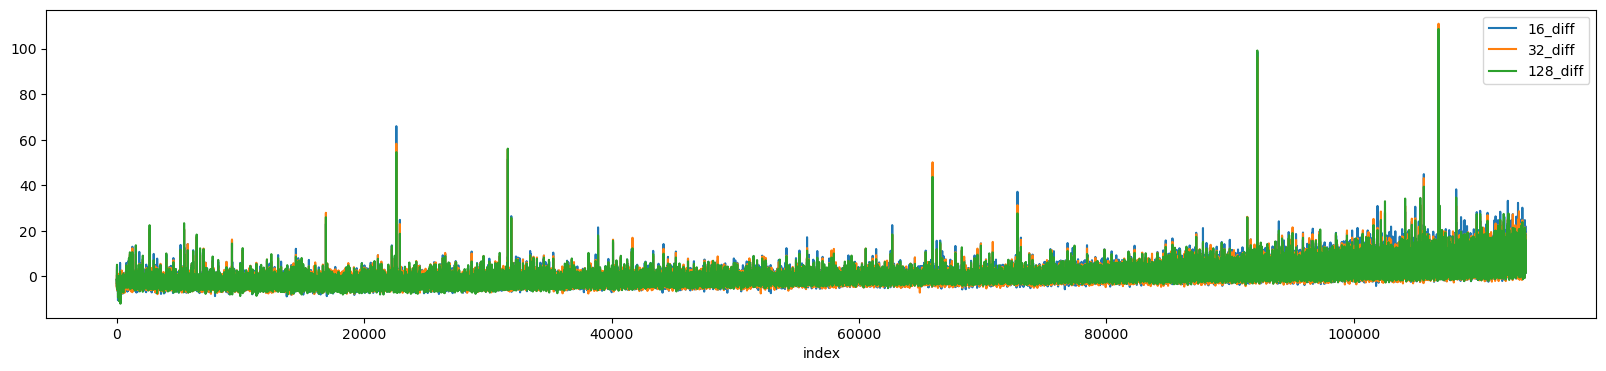

In [13]:
red_new_df.reset_index().plot(figsize=[20, 4], x='index', y=['16_diff', '32_diff', '128_diff'])

<Axes: xlabel='index'>

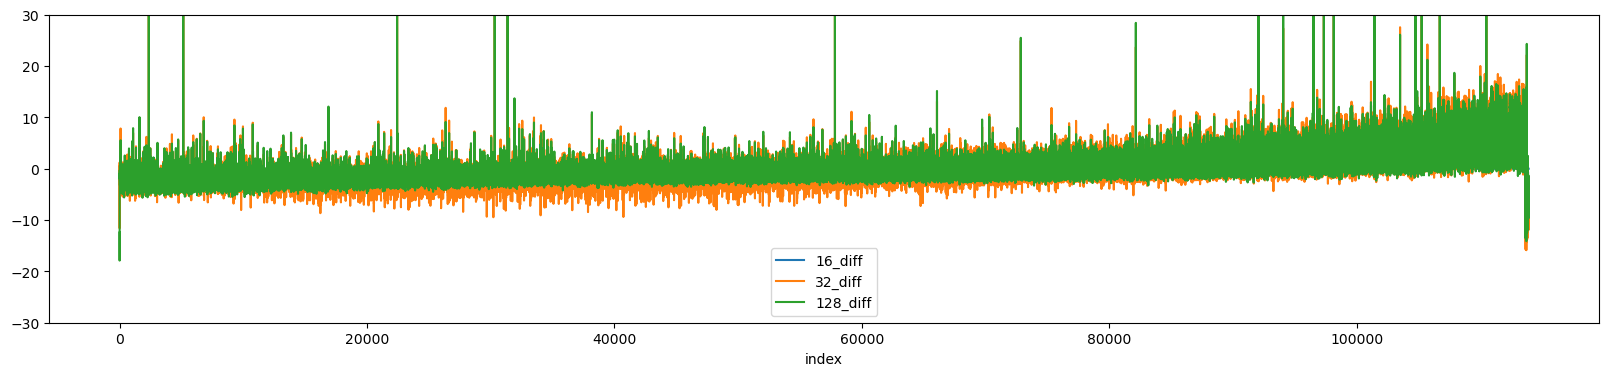

In [14]:
green_new_df.reset_index().plot(figsize=[20, 4], ylim=[-30, 30], x='index', y=['16_diff', '32_diff', '128_diff'])

<Axes: xlabel='index'>

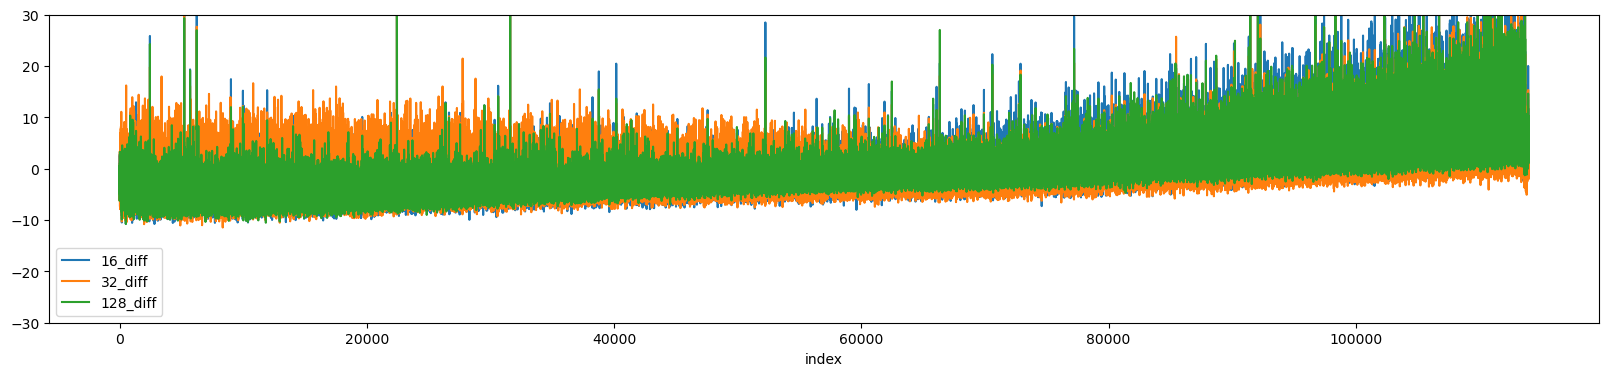

In [15]:
blue_new_df.reset_index().plot(figsize=[20, 4], ylim=[-30, 30], x='index', y=['16_diff', '32_diff', '128_diff'])

In [16]:

red_binary = reconstruct_mask(red_binary, red_covered_pixels_mapping)

green_binary = reconstruct_mask(green_binary, green_covered_pixels_mapping)

blue_binary = reconstruct_mask(blue_binary, blue_covered_pixels_mapping)

In [17]:
red_binary.shape

(1774, 2358)

In [18]:
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/output/red_image_255.png', red_image_255)

True

In [19]:
rgb_binary = np.array([red_binary, green_binary, blue_binary])
rgb_percentage = np.zeros(rgb_binary.shape)

In [20]:
def normalize(image_255, thres, max):
    norm = np.where(image_255 > thres, image_255, 0)
    norm = max * (norm / norm[norm > 0].mean())
    return norm


In [21]:
red_image_255_norm = normalize(red_image_255, 8, 200)
green_image_255_norm = normalize(green_image_255, 8, 200)
blue_image_255_norm = normalize(blue_image_255, 8, 200)

In [22]:

for row in range(0,len(rgb_binary[0])):
    for col in range(0, len(rgb_binary[0][0])):
        if (rgb_binary[0][row][col] != 0 and rgb_binary[1][row][col] != 0) or (rgb_binary[0][row][col] != 0 and rgb_binary[2][row][col] != 0) or (rgb_binary[1][row][col] != 0 and rgb_binary[2][row][col] != 0):
            sum = red_image_255_norm[row][col] + green_image_255_norm[row][col] + blue_image_255_norm[row][col]
            rgb_percentage[0][row][col] = red_image_255_norm[row][col] / sum
            rgb_percentage[1][row][col] = green_image_255_norm[row][col] / sum
            rgb_percentage[2][row][col] = blue_image_255_norm[row][col] / sum


In [60]:
# red_ol_new_df, green_ol_new_df, blue_ol_new_df, idxx  = generate_RGB_dataframes(red_covered_pixels_mapping, green_covered_pixels_mapping, blue_covered_pixels_mapping, True,6, rgb_percentage)

In [61]:
overlap_percentage = rgb_percentage

In [62]:
overlap_set = []
red_signal_map_16, a = get_signal_mapping_overlap(clear_image_noisy_16, red_covered_pixels_mapping, overlap_percentage[0])
overlap_set = overlap_set + (a)
red_signal_map_32 = get_signal_mapping_overlap(clear_image_noisy_32, red_covered_pixels_mapping, overlap_percentage[0])[0]
red_signal_map_128 = get_signal_mapping_overlap(clear_image_noisy_128, red_covered_pixels_mapping, overlap_percentage[0])[0]

green_signal_map_16,a = get_signal_mapping_overlap(clear_image_noisy_16, green_covered_pixels_mapping, overlap_percentage[1])
overlap_set = overlap_set + (a)
green_signal_map_32 = get_signal_mapping_overlap(clear_image_noisy_32, green_covered_pixels_mapping, overlap_percentage[1])[0]
green_signal_map_128 = get_signal_mapping_overlap(clear_image_noisy_128, green_covered_pixels_mapping, overlap_percentage[1])[0]

blue_signal_map_16,a = get_signal_mapping_overlap(clear_image_noisy_16, blue_covered_pixels_mapping, overlap_percentage[2])
overlap_set = overlap_set + (a)
blue_signal_map_32 = get_signal_mapping_overlap(clear_image_noisy_32, blue_covered_pixels_mapping, overlap_percentage[2])[0]
blue_signal_map_128 = get_signal_mapping_overlap(clear_image_noisy_128, blue_covered_pixels_mapping, overlap_percentage[2])[0]


In [63]:


red_signal_map_ground_truth_16 = get_signal_mapping(red_image_noisy_16, red_covered_pixels_mapping)
red_signal_map_ground_truth_32 = get_signal_mapping(red_image_noisy_32, red_covered_pixels_mapping)
red_signal_map_ground_truth_128 = get_signal_mapping(red_image_noisy_128, red_covered_pixels_mapping)


green_signal_map_ground_truth_16 = get_signal_mapping(green_image_noisy_16, green_covered_pixels_mapping)
green_signal_map_ground_truth_32 = get_signal_mapping(green_image_noisy_32, green_covered_pixels_mapping)
green_signal_map_ground_truth_128 = get_signal_mapping(green_image_noisy_128, green_covered_pixels_mapping)


blue_signal_map_ground_truth_16 = get_signal_mapping(blue_image_noisy_16, blue_covered_pixels_mapping)
blue_signal_map_ground_truth_32 = get_signal_mapping(blue_image_noisy_32, blue_covered_pixels_mapping)
blue_signal_map_ground_truth_128 = get_signal_mapping(blue_image_noisy_128, blue_covered_pixels_mapping)


red_df = pd.DataFrame()
green_df = pd.DataFrame()
blue_df = pd.DataFrame()


red_df["16_ground_truth_mapping"] = red_signal_map_ground_truth_16.values()
red_df["32_ground_truth_mapping"] = red_signal_map_ground_truth_32.values()
red_df["128_ground_truth_mapping"] = red_signal_map_ground_truth_128.values()


red_df["16_mapping"] = red_signal_map_16.values()
red_df["32_mapping"] = red_signal_map_32.values()
red_df["128_mapping"] = red_signal_map_128.values()

red_df["16_diff"] = red_df["16_ground_truth_mapping"] - red_df["16_mapping"]
red_df["32_diff"] = red_df["32_ground_truth_mapping"] - red_df["32_mapping"]
red_df["128_diff"] = red_df["128_ground_truth_mapping"] - red_df["128_mapping"]

red_df["16_to_gt_ratio"] = red_df["16_mapping"] / red_df["16_ground_truth_mapping"]
red_df["32_to_gt_ratio"] = red_df["32_mapping"] / red_df["32_ground_truth_mapping"]
red_df["128_to_gt_ratio"] = red_df["128_mapping"] / red_df["128_ground_truth_mapping"]


red_df["16_diff_percentage"] = ((red_df['16_to_gt_ratio'].mean() - 1) * 100)
red_df["32_diff_percentage"] = ((red_df['32_to_gt_ratio'].mean() - 1) * 100)
red_df["128_diff_percentage"] = ((red_df['128_to_gt_ratio'].mean() - 1) * 100)



red_df['16_normalized'] = red_df['16_to_gt_ratio'].mean() * red_df["16_ground_truth_mapping"]
red_df['32_normalized'] = red_df['32_to_gt_ratio'].mean() * red_df["32_ground_truth_mapping"]
red_df['128_normalized'] = red_df['128_to_gt_ratio'].mean() * red_df["128_ground_truth_mapping"]





green_df["16_ground_truth_mapping"] = green_signal_map_ground_truth_16.values()
green_df["32_ground_truth_mapping"] = green_signal_map_ground_truth_32.values()
green_df["128_ground_truth_mapping"] = green_signal_map_ground_truth_128.values()


green_df["16_mapping"] = green_signal_map_16.values()
green_df["32_mapping"] = green_signal_map_32.values()
green_df["128_mapping"] = green_signal_map_128.values()


green_df["16_diff"] = green_df["16_ground_truth_mapping"] - green_df["16_mapping"]
green_df["32_diff"] = green_df["32_ground_truth_mapping"] - green_df["32_mapping"]
green_df["128_diff"] = green_df["128_ground_truth_mapping"] - green_df["128_mapping"]


green_df["16_to_gt_ratio"] = green_df["16_mapping"] / green_df["16_ground_truth_mapping"]
green_df["32_to_gt_ratio"] = green_df["32_mapping"] / green_df["32_ground_truth_mapping"]
green_df["128_to_gt_ratio"] = green_df["128_mapping"] / green_df["128_ground_truth_mapping"]


green_df["16_diff_percentage"] = ((green_df['16_to_gt_ratio'].mean() - 1) * 100)
green_df["32_diff_percentage"] = ((green_df['32_to_gt_ratio'].mean() - 1) * 100)
green_df["128_diff_percentage"] = ((green_df['128_to_gt_ratio'].mean() - 1) * 100)


green_df['16_normalized'] = green_df['16_to_gt_ratio'].mean() * green_df["16_ground_truth_mapping"]
green_df['32_normalized'] = green_df['32_to_gt_ratio'].mean() * green_df["32_ground_truth_mapping"]
green_df['128_normalized'] = green_df['128_to_gt_ratio'].mean() * green_df["128_ground_truth_mapping"]


blue_df["16_ground_truth_mapping"] = blue_signal_map_ground_truth_16.values()
blue_df["32_ground_truth_mapping"] = blue_signal_map_ground_truth_32.values()
blue_df["128_ground_truth_mapping"] = blue_signal_map_ground_truth_128.values()


blue_df["16_mapping"] = blue_signal_map_16.values()
blue_df["32_mapping"] = blue_signal_map_32.values()
blue_df["128_mapping"] = blue_signal_map_128.values()
 
blue_df["16_diff"] = blue_df["16_ground_truth_mapping"] - blue_df["16_mapping"]
blue_df["32_diff"] = blue_df["32_ground_truth_mapping"] - blue_df["32_mapping"]
blue_df["128_diff"] = blue_df["128_ground_truth_mapping"] - blue_df["128_mapping"]


blue_df["16_to_gt_ratio"] = blue_df["16_mapping"] / blue_df["16_ground_truth_mapping"]
blue_df["32_to_gt_ratio"] = blue_df["32_mapping"] / blue_df["32_ground_truth_mapping"]
blue_df["128_to_gt_ratio"] = blue_df["128_mapping"] / blue_df["128_ground_truth_mapping"]


blue_df["16_diff_percentage"] = ((blue_df['16_to_gt_ratio'].mean() - 1) * 100)
blue_df["32_diff_percentage"] = ((blue_df['32_to_gt_ratio'].mean() - 1) * 100)
blue_df["128_diff_percentage"] = ((blue_df['128_to_gt_ratio'].mean() - 1) * 100)


blue_df['16_normalized'] = blue_df['16_to_gt_ratio'].mean() * blue_df["16_ground_truth_mapping"]
blue_df['32_normalized'] = blue_df['32_to_gt_ratio'].mean() * blue_df["32_ground_truth_mapping"]
blue_df['128_normalized'] = blue_df['128_to_gt_ratio'].mean() * blue_df["128_ground_truth_mapping"]


red_ol_new_df = pd.DataFrame()

red_ol_new_df['16_diff'] = 100 * ((red_df['16_mapping'] / red_df['16_mapping'].mean()) - (red_df['16_ground_truth_mapping'] / red_df['16_ground_truth_mapping'].mean()))/((red_df['16_ground_truth_mapping'] / red_df['16_ground_truth_mapping'].mean()))
red_ol_new_df['32_diff'] = 100 * ((red_df['32_mapping'] / red_df['32_mapping'].mean()) - (red_df['32_ground_truth_mapping'] / red_df['32_ground_truth_mapping'].mean()))/((red_df['32_ground_truth_mapping'] / red_df['32_ground_truth_mapping'].mean()))
red_ol_new_df['128_diff'] = 100 * ((red_df['128_mapping'] / red_df['128_mapping'].mean()) - (red_df['128_ground_truth_mapping'] / red_df['128_ground_truth_mapping'].mean()))/((red_df['128_ground_truth_mapping'] / red_df['128_ground_truth_mapping'].mean()))

red_ol_new_df['A-1_16'] = 100 * ((red_df['16_mapping'] / red_df['16_mapping'].mean()) - 1)
red_ol_new_df['A-1_32'] = 100 * ((red_df['32_mapping'] / red_df['32_mapping'].mean()) - 1)
red_ol_new_df['A-1_128'] = 100 * ((red_df['128_mapping'] / red_df['128_mapping'].mean()) - 1)

red_ol_new_df['B-1_16'] = 100 * ((red_df['16_ground_truth_mapping'] / red_df['16_ground_truth_mapping'].mean()) - 1)
red_ol_new_df['B-1_32'] = 100 * ((red_df['32_ground_truth_mapping'] / red_df['32_ground_truth_mapping'].mean()) - 1)
red_ol_new_df['B-1_128'] = 100 * ((red_df['128_ground_truth_mapping'] / red_df['128_ground_truth_mapping'].mean()) - 1)


green_ol_new_df = pd.DataFrame()

green_ol_new_df['16_diff'] = 100 * ((green_df['16_mapping'] / green_df['16_mapping'].mean()) - (green_df['16_ground_truth_mapping'] / green_df['16_ground_truth_mapping'].mean()))/((green_df['16_ground_truth_mapping'] / green_df['16_ground_truth_mapping'].mean()))
green_ol_new_df['32_diff'] = 100 * ((green_df['32_mapping'] / green_df['32_mapping'].mean()) - (green_df['32_ground_truth_mapping'] / green_df['32_ground_truth_mapping'].mean()))/((green_df['32_ground_truth_mapping'] / green_df['32_ground_truth_mapping'].mean()))
green_ol_new_df['128_diff'] = 100 * ((green_df['128_mapping'] / green_df['128_mapping'].mean()) - (green_df['128_ground_truth_mapping'] / green_df['128_ground_truth_mapping'].mean()))/((green_df['128_ground_truth_mapping'] / green_df['128_ground_truth_mapping'].mean()))


green_ol_new_df['A-1_16'] = 100 * ((green_df['16_mapping'] / green_df['16_mapping'].mean()) - 1)
green_ol_new_df['A-1_32'] = 100 * ((green_df['32_mapping'] / green_df['32_mapping'].mean()) - 1)
green_ol_new_df['A-1_128'] = 100 * ((green_df['128_mapping'] / green_df['128_mapping'].mean()) - 1)

green_ol_new_df['B-1_16'] = 100 * ((green_df['16_ground_truth_mapping'] / green_df['16_ground_truth_mapping'].mean()) - 1)
green_ol_new_df['B-1_32'] = 100 * ((green_df['32_ground_truth_mapping'] / green_df['32_ground_truth_mapping'].mean()) - 1)
green_ol_new_df['B-1_128'] = 100 * ((green_df['128_ground_truth_mapping'] / green_df['128_ground_truth_mapping'].mean()) - 1)


blue_ol_new_df = pd.DataFrame()

blue_ol_new_df['16_diff'] = 100 * ((blue_df['16_mapping'] / blue_df['16_mapping'].mean()) - (blue_df['16_ground_truth_mapping'] / blue_df['16_ground_truth_mapping'].mean()))/((blue_df['16_ground_truth_mapping'] / blue_df['16_ground_truth_mapping'].mean()))
blue_ol_new_df['32_diff'] = 100 * ((blue_df['32_mapping'] / blue_df['32_mapping'].mean()) - (blue_df['32_ground_truth_mapping'] / blue_df['32_ground_truth_mapping'].mean()))/((blue_df['32_ground_truth_mapping'] / blue_df['32_ground_truth_mapping'].mean()))
blue_ol_new_df['128_diff'] = 100 * ((blue_df['128_mapping'] / blue_df['128_mapping'].mean()) - (blue_df['128_ground_truth_mapping'] / blue_df['128_ground_truth_mapping'].mean()))/((blue_df['128_ground_truth_mapping'] / blue_df['128_ground_truth_mapping'].mean()))

blue_ol_new_df['A-1_16'] = 100 * ((blue_df['16_mapping'] / blue_df['16_mapping'].mean()) - 1)
blue_ol_new_df['A-1_32'] = 100 * ((blue_df['32_mapping'] / blue_df['32_mapping'].mean()) - 1)
blue_ol_new_df['A-1_128'] = 100 * ((blue_df['128_mapping'] / blue_df['128_mapping'].mean()) - 1)

blue_ol_new_df['B-1_16'] = 100 * ((blue_df['16_ground_truth_mapping'] / blue_df['16_ground_truth_mapping'].mean()) - 1)
blue_ol_new_df['B-1_32'] = 100 * ((blue_df['32_ground_truth_mapping'] / blue_df['32_ground_truth_mapping'].mean()) - 1)
blue_ol_new_df['B-1_128'] = 100 * ((blue_df['128_ground_truth_mapping'] / blue_df['128_ground_truth_mapping'].mean()) - 1)

<Axes: xlabel='index'>

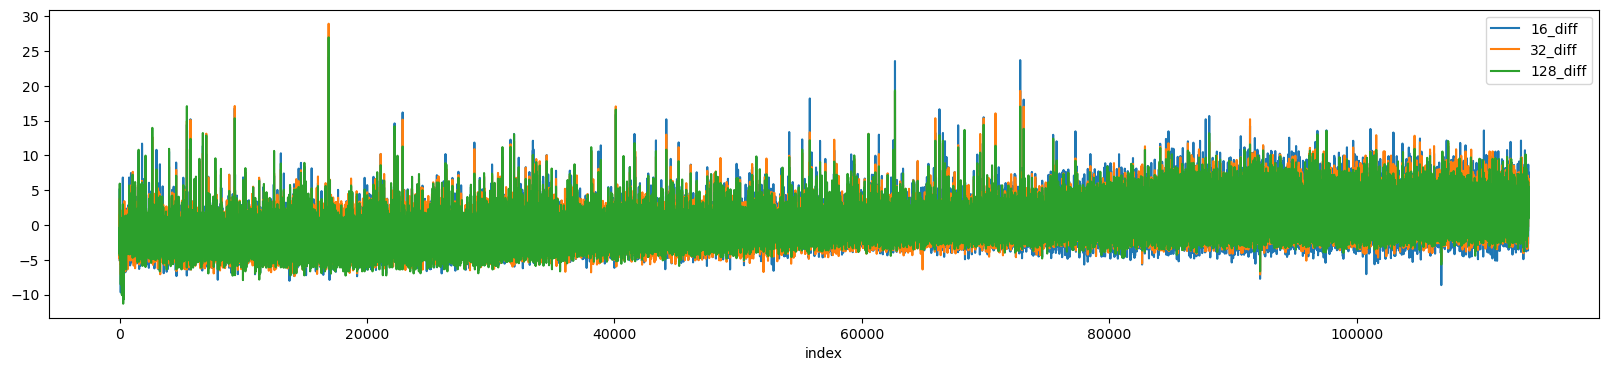

In [64]:
red_ol_new_df.reset_index().plot(figsize=[20, 4], x='index', y=['16_diff', '32_diff', '128_diff'])

<Axes: xlabel='index'>

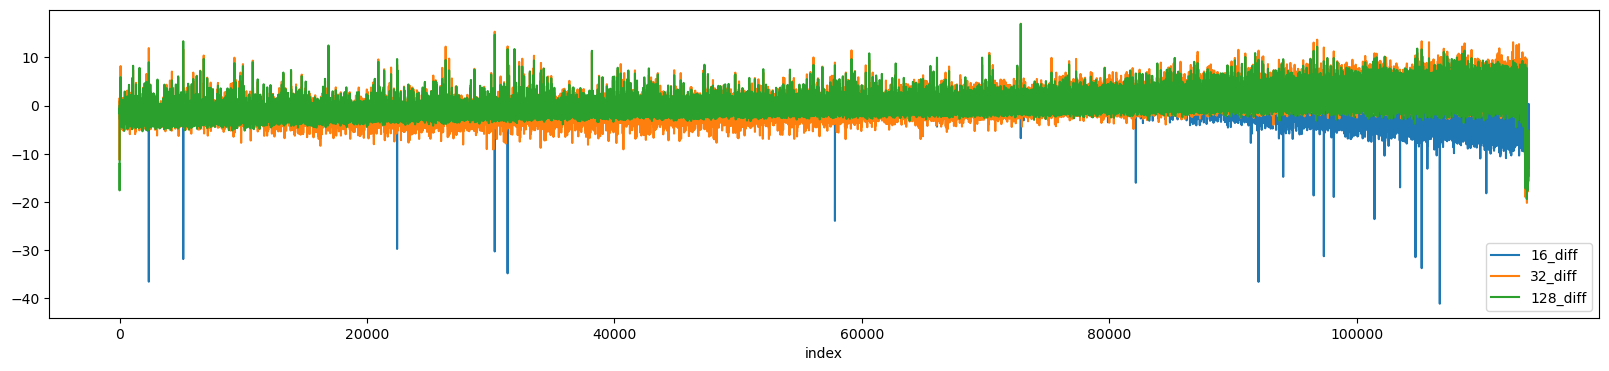

In [65]:
green_ol_new_df.reset_index().plot(figsize=[20, 4], x='index', y=['16_diff', '32_diff', '128_diff'])

<Axes: xlabel='index'>

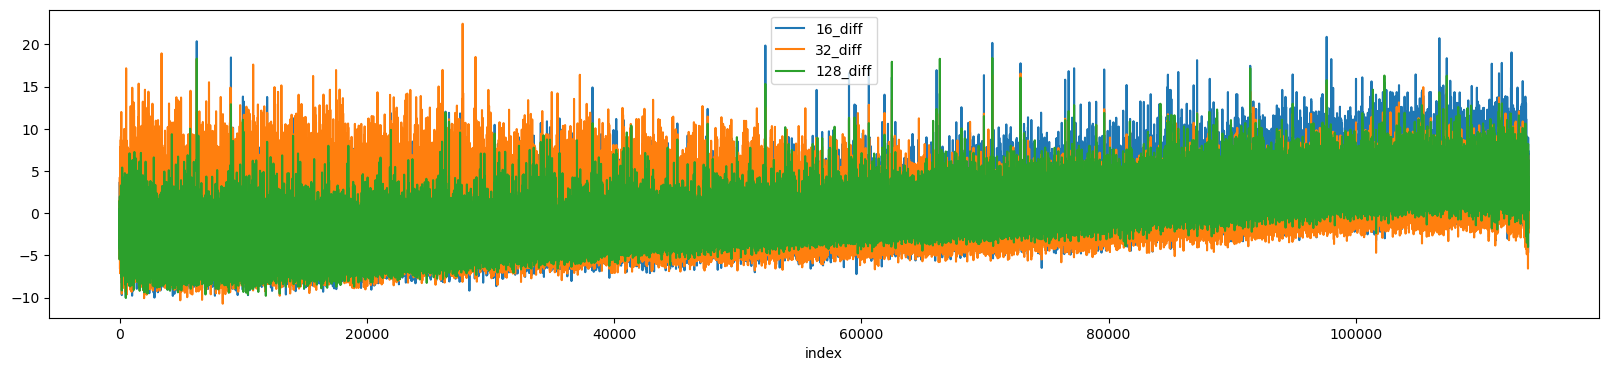

In [66]:
blue_ol_new_df.reset_index().plot(figsize=[20, 4], x='index', y=['16_diff', '32_diff', '128_diff'])

In [67]:
len(idxx)

41421

In [68]:
max_id = min(len(red_new_df), len(green_new_df), len(blue_new_df))

idxx = list(filter(lambda x: x < max_id, idxx))

In [69]:
red_new_df.iloc[idxx].reset_index().reset_index()

level_0   index   16_diff   32_diff  128_diff     A-1_16     A-1_32  \
0            0     190 -2.521337 -1.982879 -2.092665   4.799934  -8.475053   
1            1     191 -2.438229 -2.884357 -3.234714  12.799929   8.518969   
2            2     192 -1.396800 -1.955220 -1.995541  -3.466728   1.964132   
3            3     193 -1.242080 -1.900293 -0.513602  24.266588  10.703914   
4            4     194 -1.308787 -0.514747 -0.685744   6.399933  10.946686   
...        ...     ...       ...       ...       ...        ...        ...   
41416    41416  113880  3.394183  3.793102  1.912507  -9.333391  -2.162988   
41417    41417  113881  2.861535  2.386035  3.509829  -0.533396   1.721360   
41418    41418  113882  4.396893  3.419568  2.741416  -7.200059   3.663534   
41419    41419  113883  1.447260  2.968821  2.376732   9.066598   0.021958   
41420    41420  113884  6.479947  4.886479  3.157788 -26.133380 -26.197391   

         A-1_128     B-1_16     B-1_32    B-1_128  
0      -7.164498   7.510640  -6.623511  -5.180238  
1      -0.623243  15.618984  11.742007   2.698768  
2       0.383104  -2.099250   3.997511   2.427078  
3       5.414839  25.829492  12.848363   5.959047  
4       7.930706   7.810949  11.520736   8.675945  
...          ...        ...        ...        ...  
41416  -0.874829 -12.309758  -5.738426  -2.735029  
41417   2.647385  -3.300486  -0.649186  -0.833200  
41418  -3.139110 -11.108521   0.235899  -5.723618  
41419  -5.151804   7.510640  -2.861899  -7.353757  
41420 -13.957339 -30.628610 -29.635726 -16.591212  

[41421 rows x 11 columns]

<Axes: xlabel='level_0'>

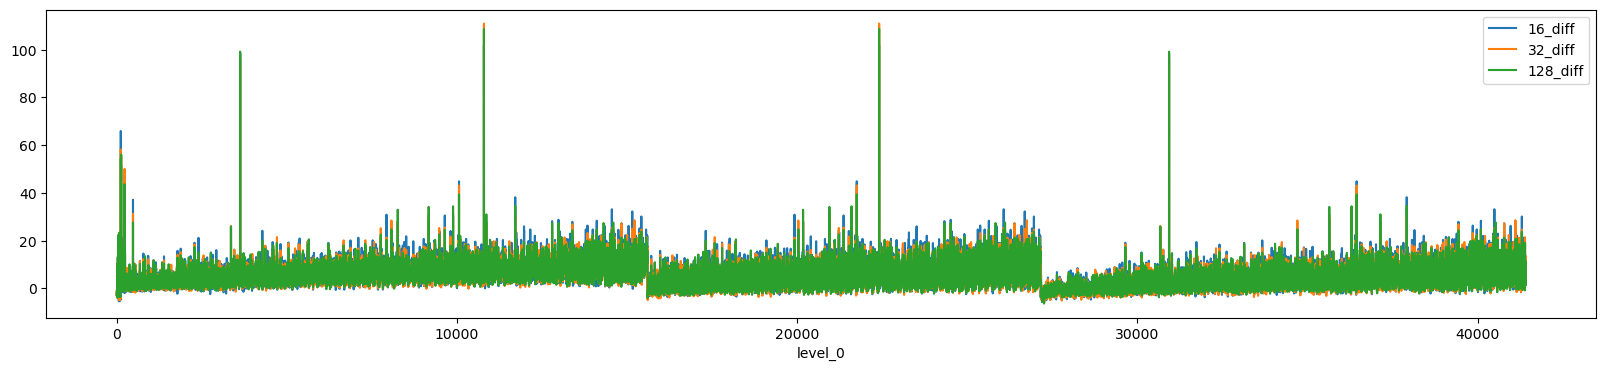

In [70]:
red_new_df.iloc[idxx].reset_index().reset_index().plot(figsize=[20, 4],x='level_0', y=['16_diff', '32_diff', '128_diff'], kind='line')

<Axes: xlabel='level_0'>

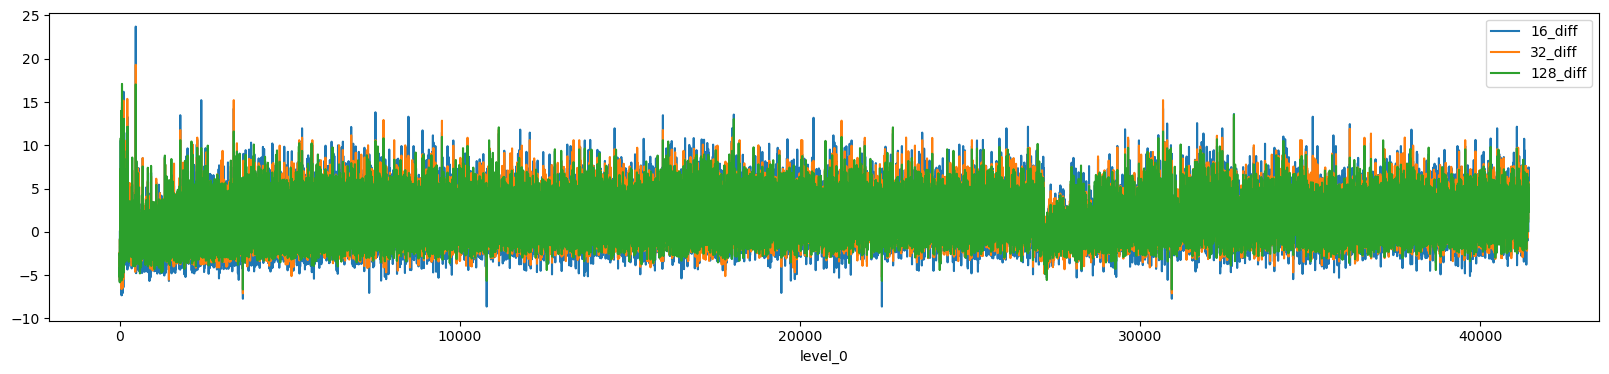

In [71]:
red_ol_new_df.iloc[idxx].reset_index().reset_index().plot(figsize=[20, 4],x='level_0', y=['16_diff', '32_diff', '128_diff'], kind='line')

<Axes: xlabel='level_0'>

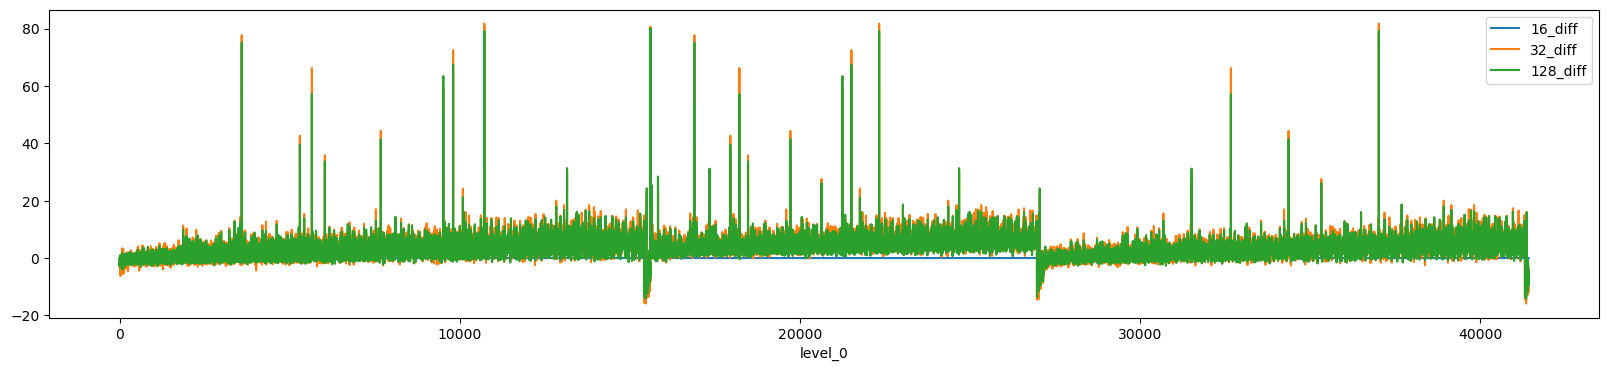

In [72]:
green_new_df.iloc[idxx].reset_index().reset_index().plot(figsize=[20, 4],x='level_0', y=['16_diff', '32_diff', '128_diff'], kind='line')

<Axes: xlabel='level_0'>

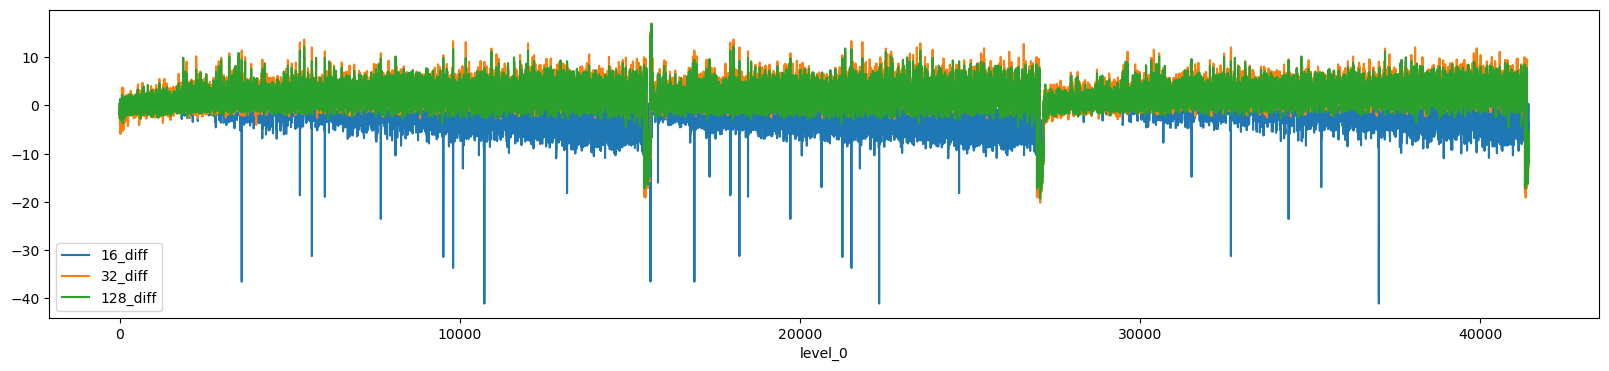

In [73]:
green_ol_new_df.iloc[idxx].reset_index().reset_index().plot(figsize=[20, 4],x='level_0', y=['16_diff', '32_diff', '128_diff'], kind='line')

<Axes: xlabel='level_0'>

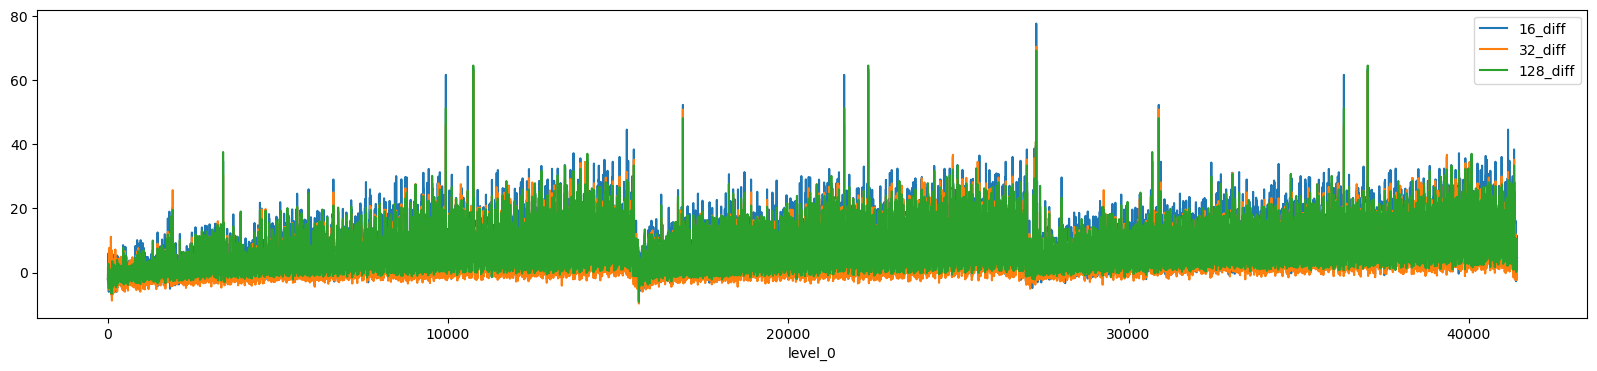

In [74]:
blue_new_df.iloc[idxx].reset_index().reset_index().plot(figsize=[20, 4],x='level_0', y=['16_diff', '32_diff', '128_diff'], kind='line')

<Axes: xlabel='level_0'>

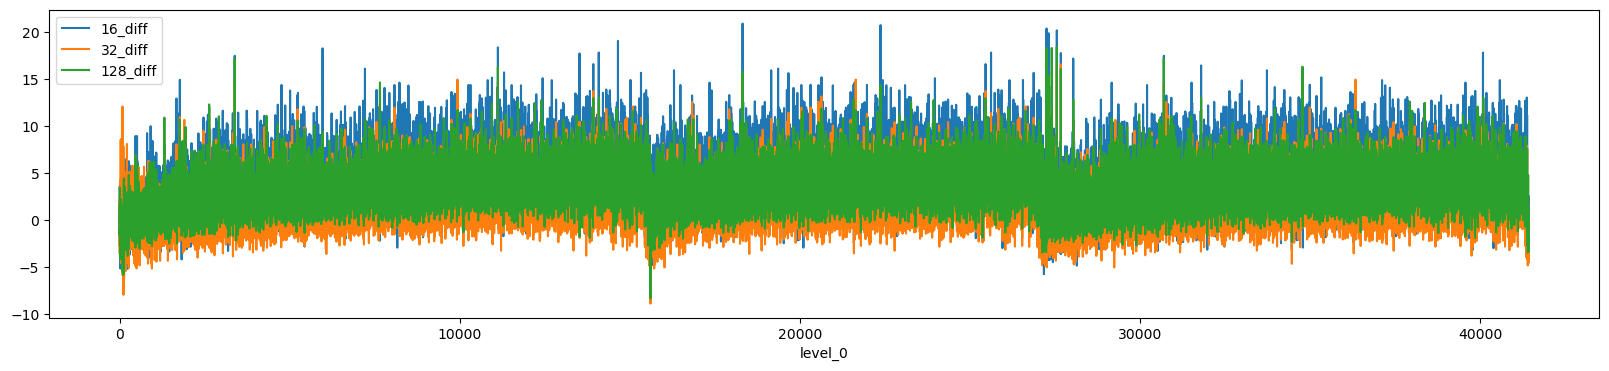

In [75]:
blue_ol_new_df.iloc[idxx].reset_index().reset_index().plot(figsize=[20, 4],x='level_0', y=['16_diff', '32_diff', '128_diff'], kind='line')

/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='index', ylabel='[128_diff]'>

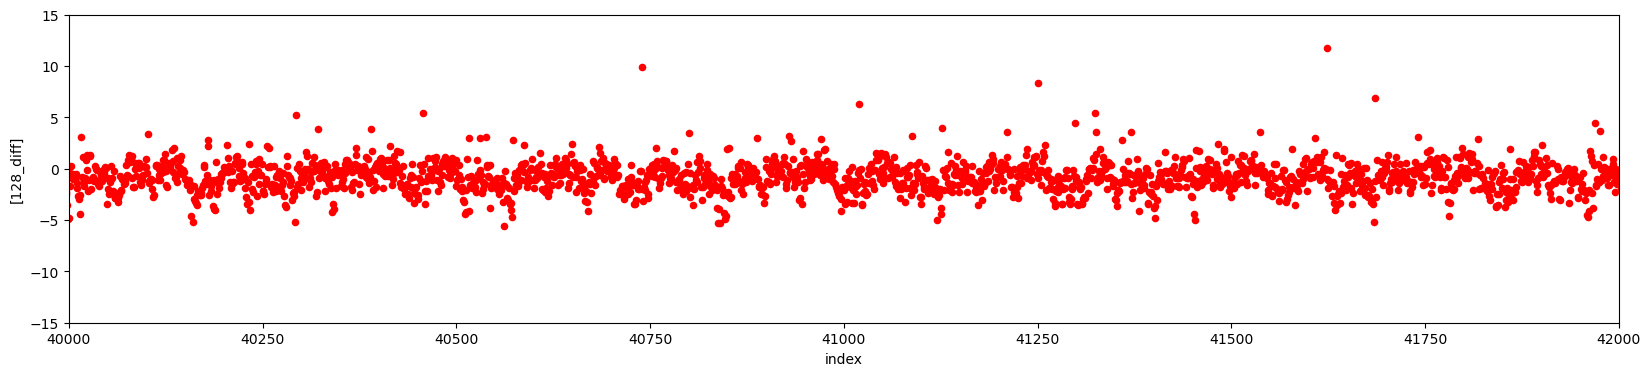

In [76]:
red_ol_new_df.reset_index().plot.scatter(figsize=[20, 4], ylim=[-15, 15],xlim=[40000, 42000], x='index', y=['128_diff'], color='red')

<Axes: xlabel='index', ylabel='[128_diff]'>

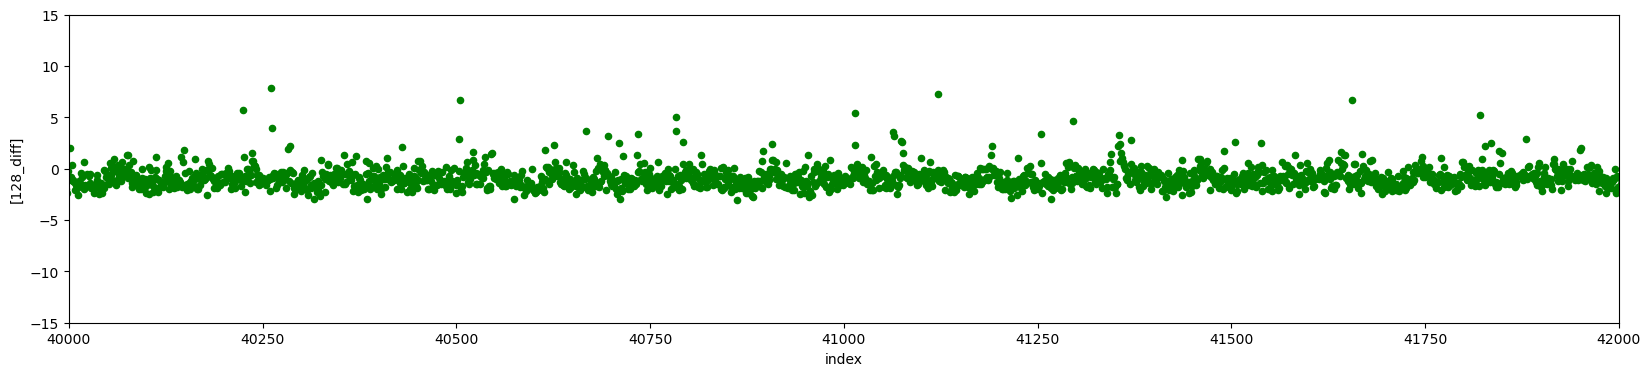

In [77]:
green_ol_new_df.reset_index().plot.scatter(figsize=[20, 4], ylim=[-15, 15],xlim=[40000, 42000], x='index', y=['128_diff'], color='green')

<Axes: xlabel='index', ylabel='[128_diff]'>

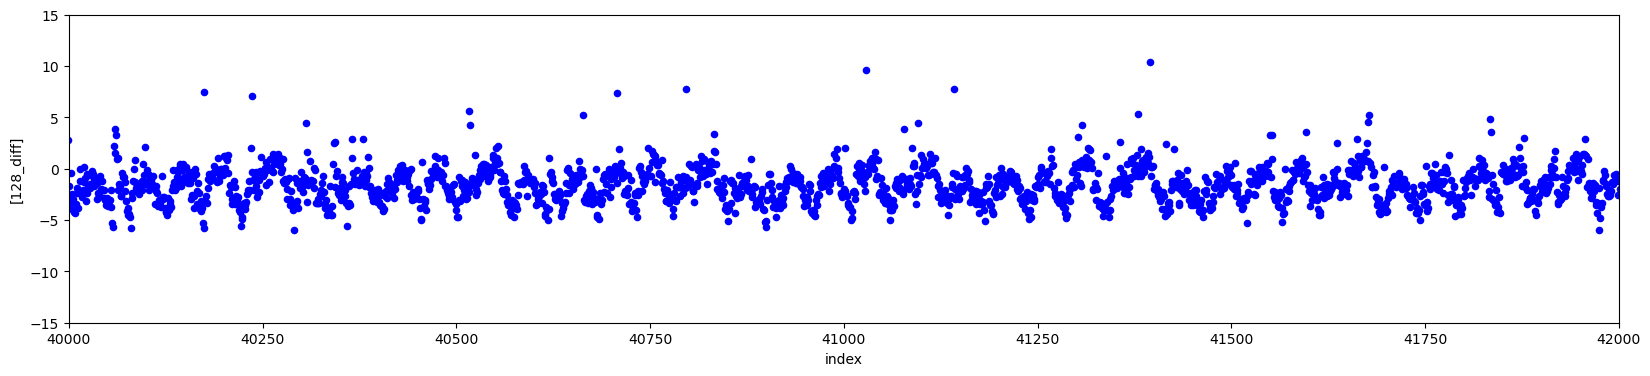

In [78]:
blue_ol_new_df.reset_index().plot.scatter(figsize=[20, 4], ylim=[-15, 15],xlim=[40000, 42000], x='index', y=['128_diff'], color='blue')

<Axes: xlabel='index', ylabel='[32_diff]'>

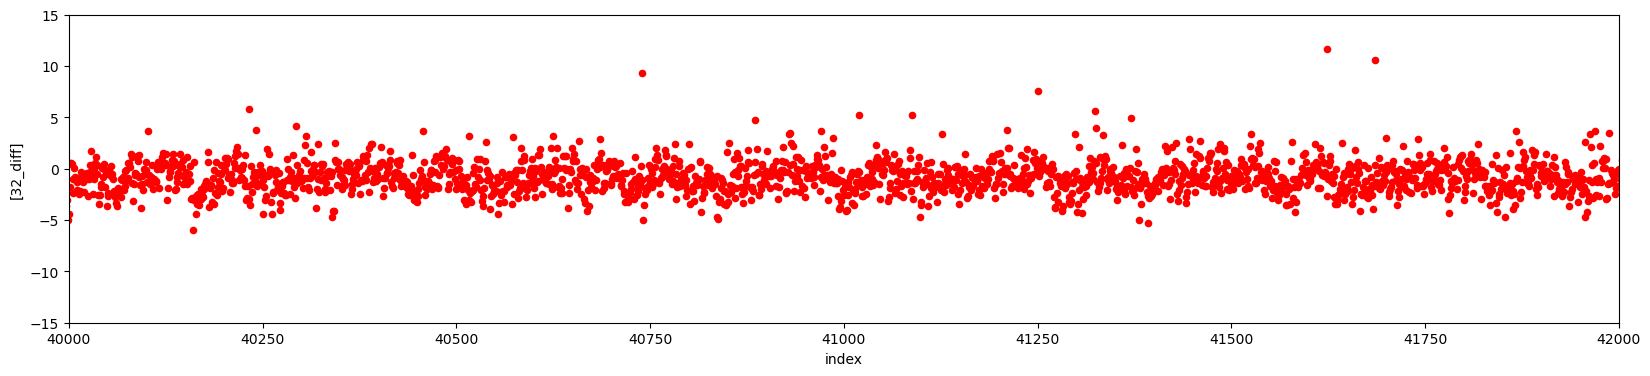

In [79]:
red_ol_new_df.reset_index().plot.scatter(figsize=[20, 4], ylim=[-15, 15],xlim=[40000, 42000], x='index', y=['32_diff'], color='red')

<Axes: xlabel='index', ylabel='[32_diff]'>

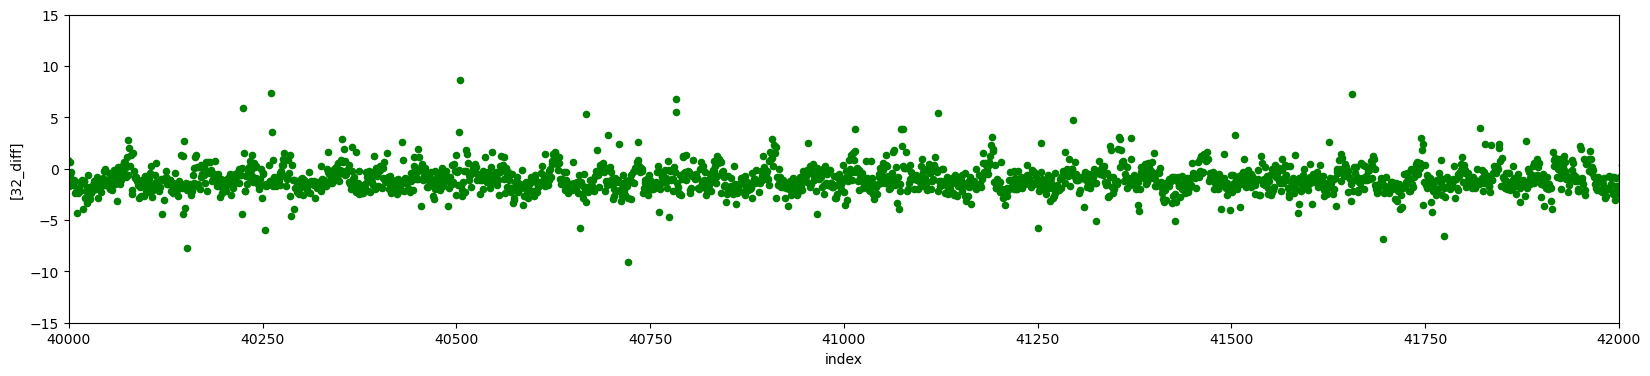

In [80]:
green_ol_new_df.reset_index().plot.scatter(figsize=[20, 4], ylim=[-15, 15],xlim=[40000, 42000], x='index', y=['32_diff'], color='green')

<Axes: xlabel='index', ylabel='[32_diff]'>

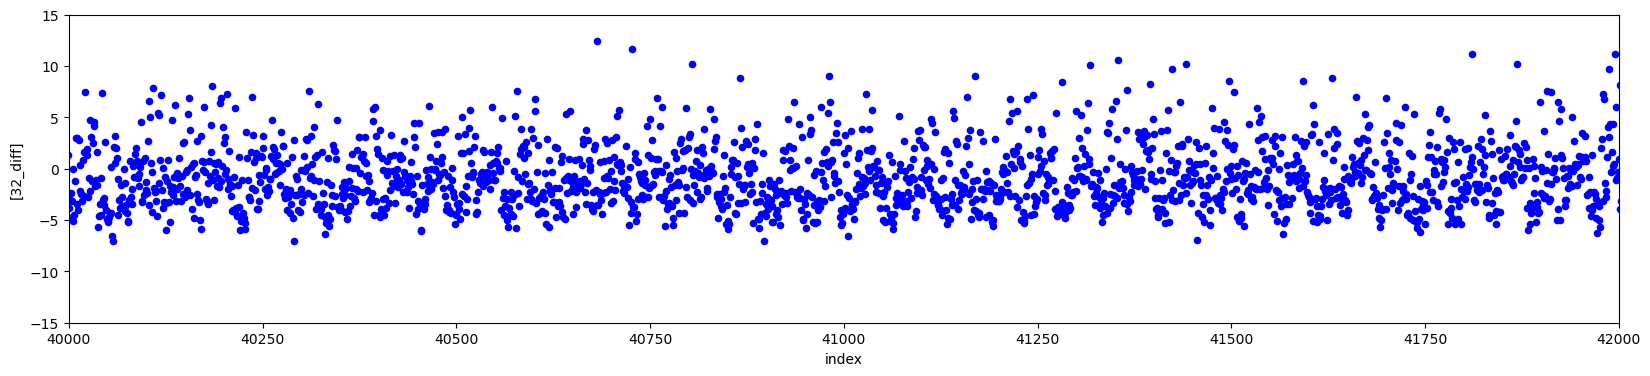

In [81]:
blue_ol_new_df.reset_index().plot.scatter(figsize=[20, 4], ylim=[-15, 15],xlim=[40000, 42000], x='index', y=['32_diff'], color='blue')

<Axes: xlabel='index', ylabel='[16_diff]'>

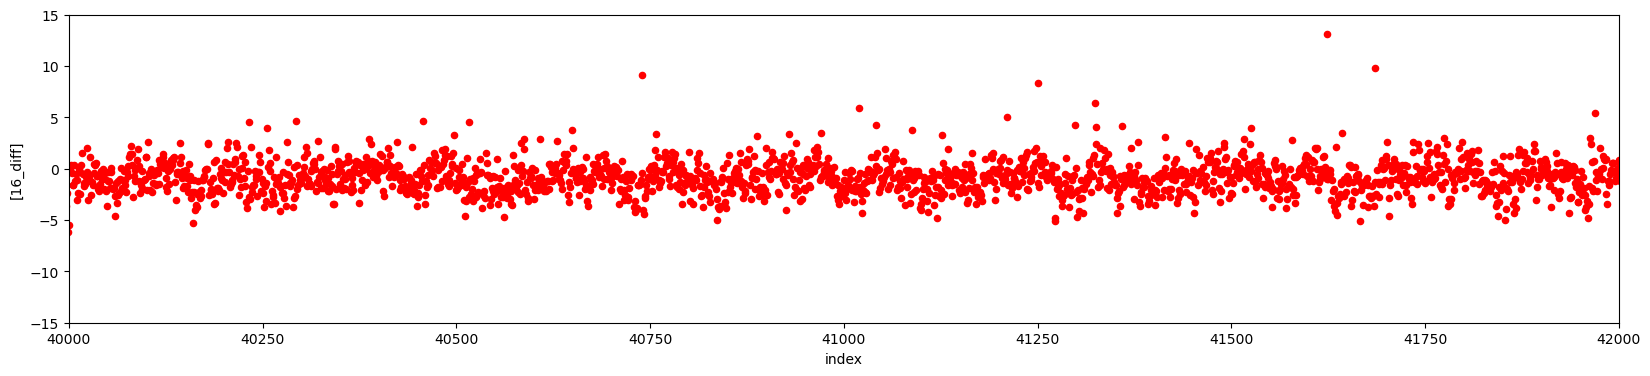

In [82]:
red_ol_new_df.reset_index().plot.scatter(figsize=[20, 4],ylim=[-15, 15], xlim=[40000, 42000], x='index', y=['16_diff'], color='red')

<Axes: xlabel='index', ylabel='[16_diff]'>

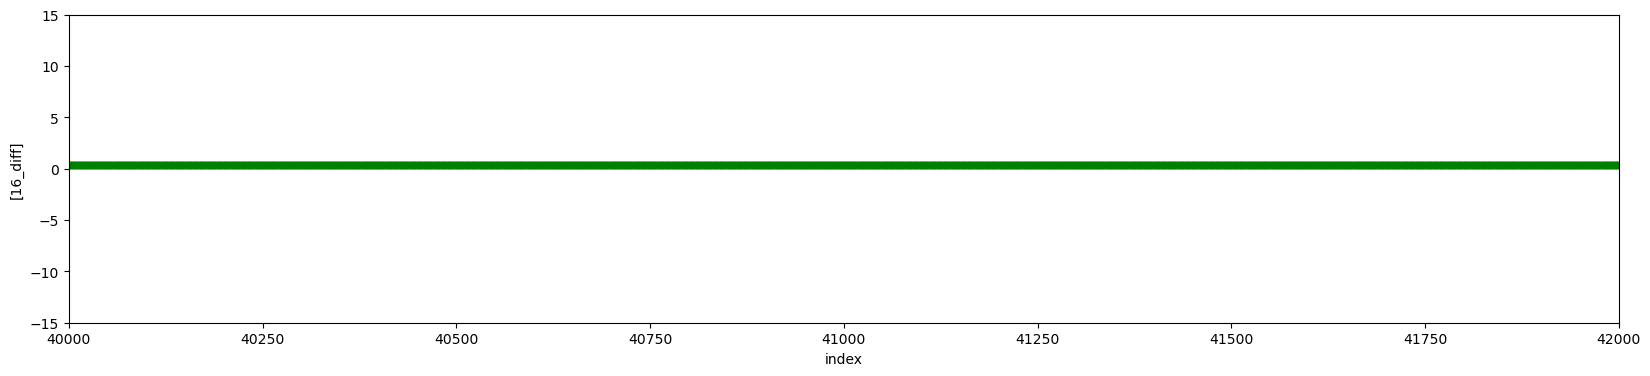

In [83]:
green_ol_new_df.reset_index().plot.scatter(figsize=[20, 4],ylim=[-15, 15], xlim=[40000, 42000], x='index', y=['16_diff'], color='green')

<Axes: xlabel='index', ylabel='[16_diff]'>

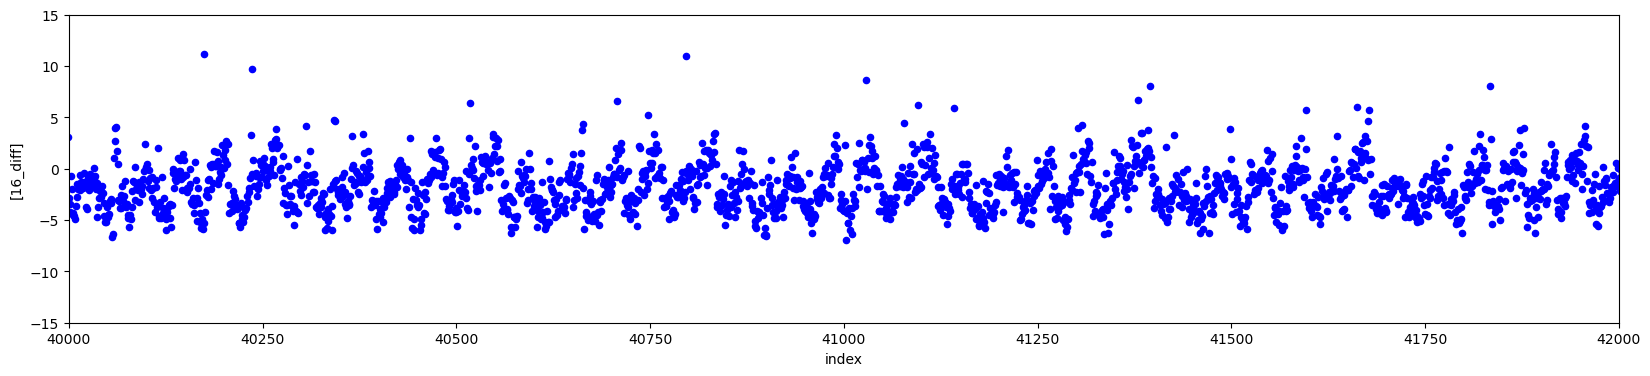

In [84]:
blue_ol_new_df.reset_index().plot.scatter(figsize=[20, 4],ylim=[-15, 15], xlim=[40000, 42000], x='index', y=['16_diff'], color='blue')

In [88]:

print(red_ol_new_df['128_diff'].mean())
print(red_ol_new_df['32_diff'].mean())
print(red_ol_new_df['16_diff'].mean())



-0.008270380874847869
0.010882696621016577
0.057221353193449134


In [89]:
print(green_ol_new_df['128_diff'].mean())
print(green_ol_new_df['32_diff'].mean())
print(green_ol_new_df['16_diff'].mean())




-0.007925632571730432
0.03238381418698742
0.019465427986071954


In [90]:
print(blue_ol_new_df['128_diff'].mean())
print(blue_ol_new_df['32_diff'].mean())
print(blue_ol_new_df['16_diff'].mean())



-0.023396368358899626
-0.09364215200947221
0.05827588735185308


In [91]:
print((len(red_ol_new_df[red_ol_new_df['128_diff'] < -10]) + len(red_ol_new_df[red_ol_new_df['128_diff'] > 10])) / len(red_ol_new_df))
print((len(red_ol_new_df[red_ol_new_df['32_diff'] < -10]) + len(red_ol_new_df[red_ol_new_df['32_diff'] > 10])) / len(red_ol_new_df))
print((len(red_ol_new_df[red_ol_new_df['16_diff'] < -10]) + len(red_ol_new_df[red_ol_new_df['16_diff'] > 10])) / len(red_ol_new_df))


0.0006935726012484306
0.0007813666014064599
0.0013081306023546352


In [92]:
print((len(green_ol_new_df[green_ol_new_df['128_diff'] < -10]) + len(green_ol_new_df[green_ol_new_df['128_diff'] > 10])) / len(green_ol_new_df))
print((len(green_ol_new_df[green_ol_new_df['32_diff'] < -10]) + len(green_ol_new_df[green_ol_new_df['32_diff'] > 10])) / len(green_ol_new_df))
print((len(green_ol_new_df[green_ol_new_df['16_diff'] < -10]) + len(green_ol_new_df[green_ol_new_df['16_diff'] > 10])) / len(green_ol_new_df))


0.0012468718444044432
0.0018000614655134565
0.0005883127716556175


In [93]:
print((len(blue_ol_new_df[blue_ol_new_df['128_diff'] < -10]) + len(blue_ol_new_df[blue_ol_new_df['128_diff'] > 10])) / len(blue_ol_new_df))
print((len(blue_ol_new_df[blue_ol_new_df['32_diff'] < -10]) + len(blue_ol_new_df[blue_ol_new_df['32_diff'] > 10])) / len(blue_ol_new_df))
print((len(blue_ol_new_df[blue_ol_new_df['16_diff'] < -10]) + len(blue_ol_new_df[blue_ol_new_df['16_diff'] > 10])) / len(blue_ol_new_df))


0.0010177313364742627
0.003465550671614947
0.007764588213618298


In [94]:
print(red_ol_new_df[(-10 < red_ol_new_df['128_diff']) & (red_ol_new_df['128_diff'] < 10)]['128_diff'].mean())
print(red_ol_new_df[(-10 < red_ol_new_df['32_diff']) & (red_ol_new_df['32_diff'] < 10)]['32_diff'].mean())
print(red_ol_new_df[(-10 < red_ol_new_df['16_diff']) & (red_ol_new_df['16_diff'] < 10)]['16_diff'].mean())


-0.014658547989406608
0.00144602108410532
0.041750205072968165


In [95]:
print(green_ol_new_df[(-10 < green_ol_new_df['128_diff']) & (green_ol_new_df['128_diff'] < 10)]['128_diff'].mean())
print(green_ol_new_df[(-10 < green_ol_new_df['32_diff']) & (green_ol_new_df['32_diff'] < 10)]['32_diff'].mean())
print(green_ol_new_df[(-10 < green_ol_new_df['16_diff']) & (green_ol_new_df['16_diff'] < 10)]['16_diff'].mean())


0.003744780776889965
0.042707982156384286
0.02884740742639622


In [96]:
print(blue_ol_new_df[(-10 < blue_ol_new_df['128_diff']) & (blue_ol_new_df['128_diff'] < 10)]['128_diff'].mean())
print(blue_ol_new_df[(-10 < blue_ol_new_df['32_diff']) & (blue_ol_new_df['32_diff'] < 10)]['32_diff'].mean())
print(blue_ol_new_df[(-10 < blue_ol_new_df['16_diff']) & (blue_ol_new_df['16_diff'] < 10)]['16_diff'].mean())


-0.035097311690846456
-0.1340077248197589
-0.0321109966814574
